In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 32 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [2]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=cb111bfa14fcd5e2e6b16de9c1dd1da903bcb90626d0ed070053af7da22f00af
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [3]:
import h2o

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpn6hraefq
  JVM stdout: /tmp/tmpn6hraefq/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpn6hraefq/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 12 days
H2O_cluster_name:,H2O_from_python_unknownUser_alq7cw
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
from h2o.automl import H2OAutoML

In [6]:
churn_df = h2o.import_file('Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [8]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [9]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [10]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No


In [11]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [12]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [13]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
23:03:04.657: Project: AutoML_1_20240201_230304
23:03:04.663: Cross-validation disabled by user: no fold column nor nfolds > 1.
23:03:04.663: Setting stopping tolerance adaptively based on the training frame: 0.014265349750363764
23:03:04.664: Build control seed: 10
23:03:04.664: training frame: Frame key: AutoML_1_20240201_230304_training_py_2_sid_a937    cols: 21    rows: 4914  chunks: 8    size: 230434  checksum: -1843772021328269690
23:03:04.665: validation frame: Frame key: py_4_sid_a937    cols: 21    rows: 1057  chunks: 8    size: 103659  checksum: 1976188612485522813
23:03:04.665: leaderboard frame: Frame key: py_4_sid_a937    cols: 21    rows: 1057  chunks: 8    size: 103659  checksum: 1976188612485522813
23:03:04.665: blending frame: NULL
23:03:04.665: response column: Churn
23:03:04.665: fold column: null
23:03:04.678: weights column: null
23:03:04.738: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_1_AutoML_1_20240201_230304


GLM Model: summary
    family    link    regularization               lambda_search                                                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ---------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  -----------------------------------------------
    binomial  logit   Ridge ( lambda = 4.292E-4 )  nlambda = 30, lambda.max = 15.291, lambda.min = 4.292E-4, lambda.1se = -1.0  45                            45                             44                      AutoML_1_20240201_230304_training_py_2_sid_a937

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.13422217899169256
RMSE: 0.36636345204140186
LogLoss: 0.4135721068492474
AUC: 0.8467184933522378
AUCPR: 0.6537352855293985
Gini: 0.6934369867044756
Null degrees of freedom: 4913
Residual degrees of freedom: 4868
Null deviance: 5655.631553260391
Residual deviance: 4064.586666114403
AIC: 4156.586666114403

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2577181011334908
       No    Yes    Error    Rate
-----  ----  -----  -------  ---------------
No     2625  1000   0.2759   (1000.0/3625.0)
Yes    231   1058   0.1792   (231.0/1289.0)
Total  2856  2058   0.2505   (1231.0/4914.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.257718     0.632208  241
max f2                       0.153393     0.755541  293
max f0point5                 0.526288     0.633679  119
max accuracy                 0.526288     0.806878  119
max precision                0.860906     1         0
max recall                   0.00382676   1         397
max specificity              0.860906     1         0
max absolute_mcc             0.257718     0.485869  241
max min_per_class_accuracy   0.297407     0.762207  220
max mean_per_class_accuracy  0.252819     0.772749  244
max tns                      0.860906     3625      0
max fns                      0.860906     1288      0
max fps                      0.00222627   3625      399
max tps                      0.00382676   1289      397
max tnr                      0.860906     1         0
max fnr                      0.860906     0.999224  0
max fpr                      0.00222627   1         399
max tpr                      0.00382676   1         397

Gains/Lift Table: Avg response rate: 26.23 %, avg score: 26.23 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010175                    0.792443           3.27854    3.27854            0.86             0.814365    0.86                        0.814365            0.0333592       0.0333592                  227.854   227.854            0.0314282
2        0.0201465                   0.765408           3.26765    3.27315            0.857143         0.779919    0.858586                    0.797316            0.0325834       0.0659426                  226.765   227.315            0.0620805
3        0.030118                    0.743803           3.03425    3.19405            0.795918         0.753106    0.837838                    0.782679            0.030256        0.0961986            

In [14]:
lb = aml.leaderboard

In [15]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20240201_230304,0.85053,0.408264,0.652971,0.244557,0.364631,0.132956
GBM_1_AutoML_1_20240201_230304,0.849479,0.410691,0.654884,0.237015,0.366117,0.134042
XGBoost_3_AutoML_1_20240201_230304,0.846568,0.415614,0.661099,0.244455,0.36807,0.135476
XRT_1_AutoML_1_20240201_230304,0.841435,0.419054,0.663524,0.241333,0.368038,0.135452
GBM_2_AutoML_1_20240201_230304,0.840278,0.423729,0.649041,0.244201,0.372778,0.138963
XGBoost_1_AutoML_1_20240201_230304,0.839709,0.427484,0.641101,0.251389,0.373281,0.139339
GBM_4_AutoML_1_20240201_230304,0.837388,0.432341,0.640894,0.234011,0.375198,0.140774
GBM_3_AutoML_1_20240201_230304,0.834472,0.43226,0.634315,0.247609,0.375299,0.140849
DRF_1_AutoML_1_20240201_230304,0.827189,0.494101,0.628605,0.239376,0.375864,0.141274
XGBoost_2_AutoML_1_20240201_230304,0.825562,0.451631,0.639668,0.257107,0.382528,0.146327


In [16]:
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [17]:
churn_pred.head()

predict,No,Yes
Yes,0.455127,0.544873
Yes,0.317385,0.682615
Yes,0.233716,0.766284
No,0.787463,0.212537
No,0.878336,0.121664
Yes,0.542211,0.457789
No,0.986857,0.0131427
Yes,0.338024,0.661976
Yes,0.412399,0.587601
No,0.988753,0.0112474


In [18]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.13758878435342067
RMSE: 0.37092962183333467
LogLoss: 0.4260149193136459
AUC: 0.8477191672353191
AUCPR: 0.666996598379061
Gini: 0.6954383344706383
Null degrees of freedom: 1071
Residual degrees of freedom: 1026
Null deviance: 1278.8741295346495
Residual deviance: 913.3759870084567
AIC: 1005.3759870084567

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3635372437448365
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     631   138    0.1795   (138.0/769.0)
Yes    79    224    0.2607   (79.0/303.0)
Total  710   362    0.2024   (217.0/1072.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.363537     0.673684  182
max f2                       0.168171     0.758254  272
max f0point5                 0.522348     0.677473  115
max accuracy                 0.484543     0.813433  132
max precision                0.813766     1         0
max recall                   0.0138246    1         382
max specificity              0.813766     1         0
max absolute_mcc             0.422798     0.536491  159
max min_per_class_accuracy   0.318503     0.782178  203
max mean_per_class_accuracy  0.311786     0.784506  205
max tns                      0.813766     769       0
max fns                      0.813766     302       0
max fps                      0.00178519   769       399
max tps                      0.0138246    303       382
max tnr                      0.813766     1         0
max fnr                      0.813766     0.9967    0
max fpr                      0.00178519   1         399
max tpr                      0.0138246    1         382

Gains/Lift Table: Avg response rate: 28.26 %, avg score: 26.91 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102612                   0.78023            3.21632   3.21632            0.909091         0.795359    0.909091                    0.795359            0.0330033       0.0330033                  221.632   221.632            0.0317029
2        0.0205224                   0.750692           2.89469   3.05551            0.818182         0.766644    0.863636                    0.781001            0.029703        0.0627063                  189.469   205.551            0.0588051
3        0.0307836                   0.737164           2.25143   2.78748            0.636364         0.74243     0.787879                    0.768144            0.0231023       0.0858086                  125.143   178.748            0.0767059
4        0.0401119                   0.729096           2.83036   2.79745            0.8              0.733371    0.790698                    0.760057            0.0264026       0.112211                   183.036   179.745            0.100508
5        0.0503731                   0.71632            2.57306   2.75174            0.727273         0.72225     0.777778                    0.752356            0.0264026       0.138614                   157.306   175.174            0.123009
6        0.100746                    0.655297           2.42415   2.58795            0.685185         0.684351    0.731481                    0.718353            0.122112        0.260726                   142.415   158.795            0.223015
7        0.150187                    0.593911           2.73691   2.63698            0.773585         0.625937    0.745342                 

In [19]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [20]:
model_ids

['GLM_1_AutoML_1_20240201_230304',
 'GBM_1_AutoML_1_20240201_230304',
 'XGBoost_3_AutoML_1_20240201_230304',
 'XRT_1_AutoML_1_20240201_230304',
 'GBM_2_AutoML_1_20240201_230304',
 'XGBoost_1_AutoML_1_20240201_230304',
 'GBM_4_AutoML_1_20240201_230304',
 'GBM_3_AutoML_1_20240201_230304',
 'DRF_1_AutoML_1_20240201_230304',
 'XGBoost_2_AutoML_1_20240201_230304']

In [21]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [22]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20240201_230304',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20240201_230304'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240201_230304_training_py_2_sid_a937',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240201_230304_training_py_2_sid_a937'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20240201_230304_training_py_2_sid_a937',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20240201_230304_training_py_2_sid_a937'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schem

In [23]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 35)

In [24]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20240201_230304


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1033133829137149
RMSE: 0.32142399243633774
LogLoss: 0.3265308550015488
Mean Per-Class Error: 0.16347459939541478
AUC: 0.9150050560445145
AUCPR: 0.7907144636636002
Gini: 0.8300101120890291

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3550880327820778
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3126  499    0.1377   (499.0/3625.0)
Yes    244   1045   0.1893   (244.0/1289.0)
Total  3370  1544   0.1512   (743.0/4914.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.355088     0.737734  206
max f2                       0.207195     0.815366  270
max f0point5                 0.556957     0.735022  130
max accuracy                 0.415254     0.853276  181
max precision                0.971108     1         0
max recall                   0.0195009    1         383
max specificity              0.971108     1         0
max absolute_mcc             0.355088     0.637808  206
max min_per_class_accuracy   0.317983     0.834759  220
max mean_per_class_accuracy  0.32986      0.837947  215
max tns                      0.971108     3625      0
max fns                      0.971108     1288      0
max fps                      0.00256979   3625      399
max tps                      0.0195009    1289      383
max tnr                      0.971108     1         0
max fnr                      0.971108     0.999224  0
max fpr                      0.00256979   1         399
max tpr                      0.0195009    1         383

Gains/Lift Table: Avg response rate: 26.23 %, avg score: 26.11 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010175                    0.933453           3.81226    3.81226            1                0.943917    1                           0.943917            0.0387898       0.0387898                  281.226   281.226            0.0387898
2        0.0201465                   0.89465            3.50105    3.65823            0.918367         0.913038    0.959596                    0.928634            0.0349108       0.0737005                  250.105   265.823            0.0725971
3        0.030118                    0.859821           3.57885    3.63195            0.938776         0.877859    0.952703                    0.911823            0.0356866       0.109387                   257.885   263.195            0.107456
4        0.0400895                   0.831149           3.57885    3.61874            0.938776         0.844208    0.949239                    0.895005            0.0356866       0.145074                   257.885   261.874            0.142315
5        0.0500611                   0.801396           3.11205    3.51781            0.816327         0.816226    0.922764                    0.879313            0.0310318       0.176106                   211.205   251.781            0.170864
6        0.100122                    0.700935           3.19238    3.3551             0.837398         0.746922    0.880081                    0.813118            0.159814        0.335919                   219.238   235.51             0.319643
7        0.14998                     0.61082            2.70748    3.139

In [25]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [26]:
out.confusion_matrix()

,No,Yes,Error,Rate
No,3126.0,499.0,0.1377,(499.0/3625.0)
Yes,244.0,1045.0,0.1893,(244.0/1289.0)
Total,3370.0,1544.0,0.1512,(743.0/4914.0)


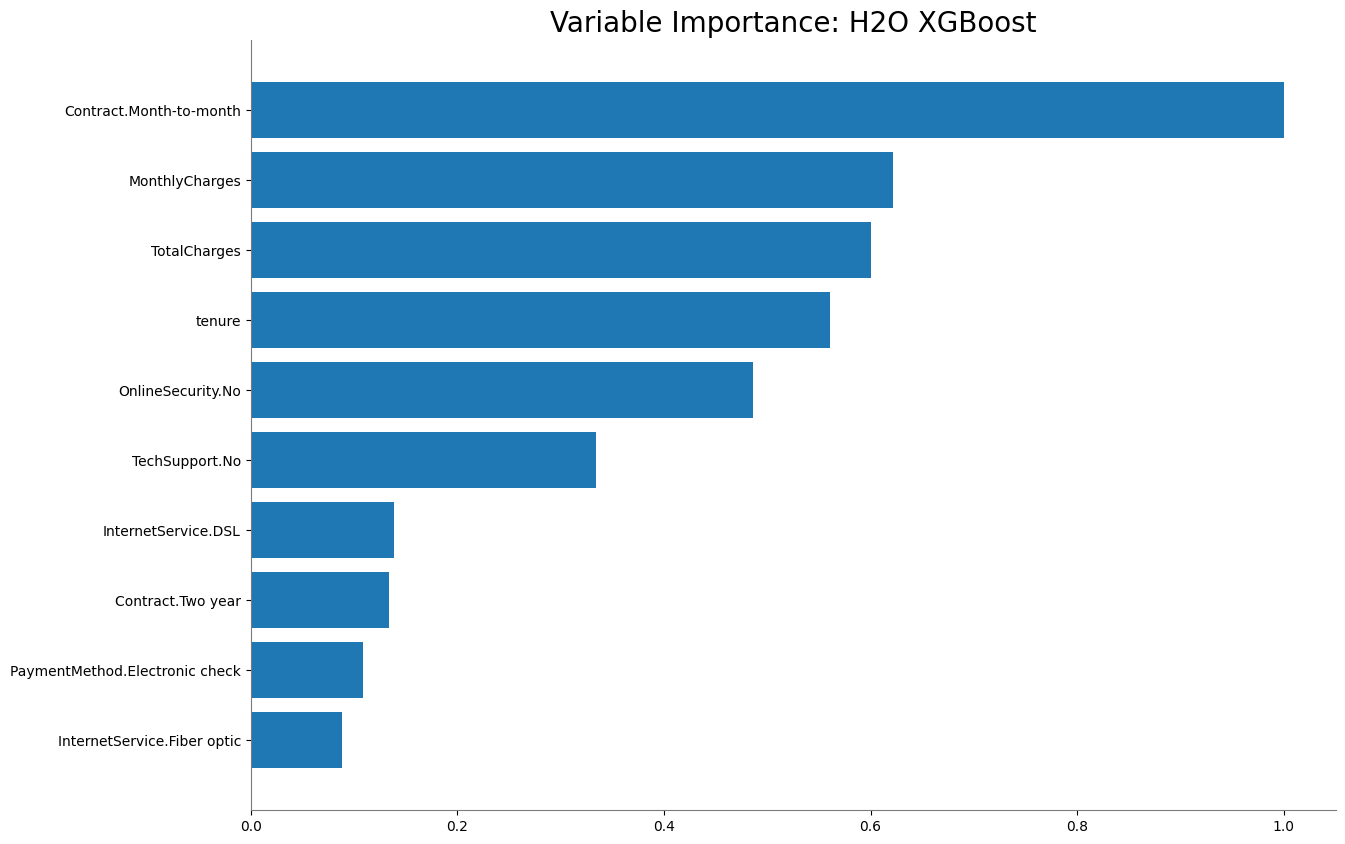

<Figure size 640x480 with 0 Axes>

In [27]:
out.varimp_plot()